In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [105]:
import tensorflow as tf

In [106]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [107]:
X_train = mnist.train.images
Y_train = mnist.train.labels


In [108]:
X_train.shape, Y_train.shape

((55000, 784), (55000, 10))

In [109]:
X_test = mnist.test.images
Y_test = mnist.test.labels

In [110]:
X_test.shape, Y_test.shape

((10000, 784), (10000, 10))

In [111]:
X_val = mnist.validation.images
y_val = mnist.validation.labels

X_val.shape, y_val.shape

((5000, 784), (5000, 10))

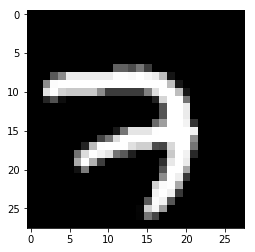

In [112]:
img_sample = X_train[0].reshape(28,28)
plt.imshow(img_sample, cmap='gray');

In [113]:
learning_rate = 0.001
training_epochs = 15
batch_size = 128
display_step = 1

n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features

In [114]:
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [115]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [116]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [117]:
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [118]:
pred = multilayer_perceptron(x, weights, biases)


In [119]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y))

In [120]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [123]:
init = tf.global_variables_initializer()

In [126]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})##############
            # Compute average loss
            avg_cost += c / total_batch ############
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "loss(cross_entropy)=", "{:.9f}".format(avg_cost))
    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy(Test Dataset):", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 loss(cross_entropy)= 165.400961540
Epoch: 0002 loss(cross_entropy)= 43.547599183
Epoch: 0003 loss(cross_entropy)= 27.760926422
Epoch: 0004 loss(cross_entropy)= 19.864883935
Epoch: 0005 loss(cross_entropy)= 14.500055096
Epoch: 0006 loss(cross_entropy)= 11.048334460
Epoch: 0007 loss(cross_entropy)= 8.151820080
Epoch: 0008 loss(cross_entropy)= 6.403942385
Epoch: 0009 loss(cross_entropy)= 4.798241026
Epoch: 0010 loss(cross_entropy)= 3.872302444
Epoch: 0011 loss(cross_entropy)= 2.779442574
Epoch: 0012 loss(cross_entropy)= 2.218251417
Epoch: 0013 loss(cross_entropy)= 1.602872573
Epoch: 0014 loss(cross_entropy)= 1.336094229
Epoch: 0015 loss(cross_entropy)= 1.009794774
Optimization Finished!
Accuracy(Test Dataset): 0.9392
